In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
import torch
from sklearn.model_selection import train_test_split
from torch import nn
import numpy as np

In [3]:
#提取数据
data=load_boston()
X=data['data']
y=data['target']
y=y.reshape(-1,1)
print(X)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [4]:
print(y)

[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22.8]
 [18.8]
 [18.7]
 [18.5]
 [18.3]
 [21.2]
 [19.2]
 [20.4]
 [19.3]
 [22. ]
 [20.3]
 [20.5]
 [17.3]
 [18.8]


In [5]:
#数据规范化
MMS=MinMaxScaler()
X=MMS.fit_transform(X)
print(X)
print(X.shape)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 2.87234043e-01
  1.00000000e+00 8.96799117e-02]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  1.00000000e+00 2.04470199e-01]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 5.53191489e-01
  9.89737254e-01 6.34657837e-02]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.07891832e-01]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  9.91300620e-01 1.31070640e-01]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 8.93617021e-01
  1.00000000e+00 1.69701987e-01]]
(506, 13)


In [6]:
#数据切分--X,y为numpy类型，需要转换为torch类型
X=torch.from_numpy(X).type(torch.FloatTensor)
y=torch.from_numpy(y).type(torch.FloatTensor)
train_x,valid_x,train_y,valid_y=train_test_split(X,y,test_size=0.2)

In [7]:
#构造网络，l1 = Linear(X, W1, b1)；s1 = Relu(l1)；l2 = Linear(s1, W2, b2)；cost = MSE(y, l2)；隐藏层维度为10
model=nn.Sequential(nn.Linear(13,10),nn.ReLU(),nn.Linear(10,1))

In [8]:
#优化器和损失函数
criterion=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),0.001)

In [9]:
#开始训练
max_epoch=1500
iter_loss=[]
for i in range(max_epoch):
    #前向传播
    y_pred=model(train_x)
    #损失函数
    loss=criterion(y_pred,train_y)
    iter_loss.append(loss.item())
    #梯度清零
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #权重调整
    optimizer.step()

In [10]:
#进行测试
output=model(valid_x)

In [11]:
y_predict=output.detach().numpy()
print(y_predict)

[[16.616684]
 [21.53619 ]
 [24.09713 ]
 [14.860708]
 [19.903185]
 [27.938763]
 [29.111118]
 [31.961082]
 [26.903294]
 [12.694488]
 [20.941261]
 [17.342676]
 [16.22961 ]
 [20.11964 ]
 [21.60933 ]
 [22.017529]
 [23.342094]
 [20.877274]
 [22.191574]
 [23.50116 ]
 [32.55314 ]
 [21.914192]
 [32.33976 ]
 [19.364376]
 [31.761229]
 [20.437428]
 [13.060713]
 [32.560287]
 [22.227016]
 [17.972609]
 [24.05645 ]
 [24.549519]
 [25.309574]
 [17.56549 ]
 [21.609837]
 [18.195251]
 [14.027759]
 [17.73518 ]
 [16.996475]
 [26.846657]
 [22.652695]
 [23.515688]
 [25.945606]
 [23.517809]
 [26.835962]
 [26.766348]
 [27.224339]
 [18.332745]
 [11.874771]
 [17.919016]
 [ 9.56625 ]
 [32.614204]
 [16.86838 ]
 [17.860952]
 [22.43075 ]
 [17.734638]
 [22.93687 ]
 [31.460468]
 [24.726803]
 [19.386023]
 [26.361433]
 [20.47109 ]
 [30.126348]
 [27.29141 ]
 [30.963686]
 [16.571674]
 [16.060171]
 [29.446766]
 [22.951408]
 [20.935125]
 [18.09756 ]
 [25.51241 ]
 [16.84052 ]
 [12.155624]
 [21.193518]
 [16.530376]
 [32.535942]

Text(0, 0.5, 'Mean loss value')

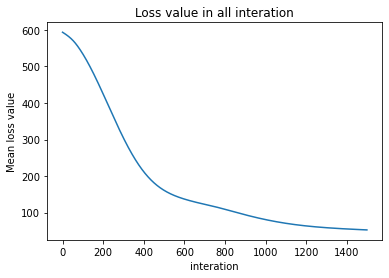

In [12]:
import matplotlib.pyplot as plt
#绘制Loss变化曲线图
x=np.arange(max_epoch)
y=np.array(iter_loss)
plt.plot(x,y)
plt.title('Loss value in all interation')
plt.xlabel('interation')
plt.ylabel('Mean loss value')

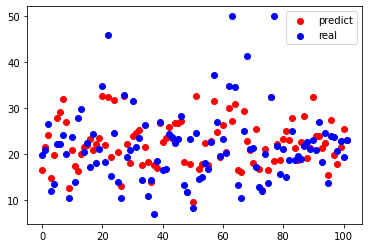

In [15]:
#绘制真实值与预测值的散点图
x=np.arange(valid_x.shape[0])
y1=np.array(y_predict)
y2=np.array(valid_y)
line1=plt.scatter(x,y1,c='red')
line2=plt.scatter(x,y2,c='blue')
plt.legend([line1,line2],['predict','real'])
plt.title('Prediction VS real')